In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump, load

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

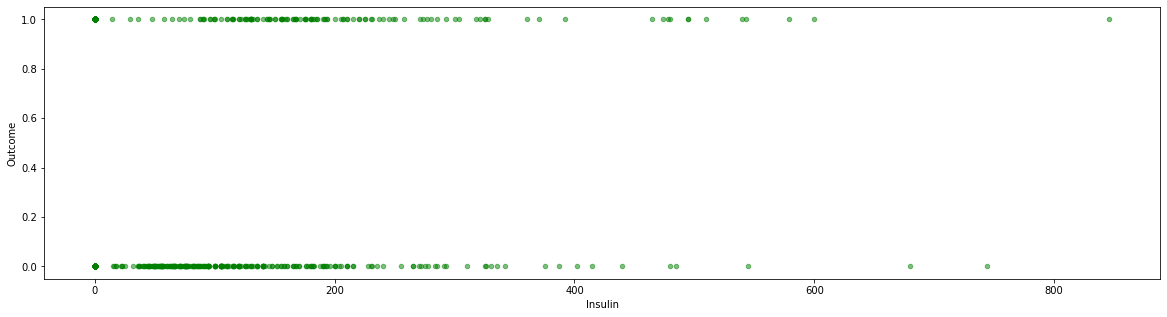

In [8]:
df.plot(kind ="scatter", x ="Insulin",y ="Outcome", color= "green",alpha= .5,figsize=(20,5))

In [9]:
X = df[["DiabetesPedigreeFunction",'Glucose']]
y = df["Outcome"]
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest,ytrain,ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)
xtrain.shape,xtest.shape


((614, 2), (154, 2))

In [10]:
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [11]:
m= KNeighborsClassifier()
m.fit(xtrain, ytrain)

KNeighborsClassifier()

In [12]:
m.score(xtest,ytest)

0.7987012987012987

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
ypred = m.predict(xtest)

In [15]:
import seaborn as sns

In [16]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[88 11]
 [20 35]]


<AxesSubplot:>

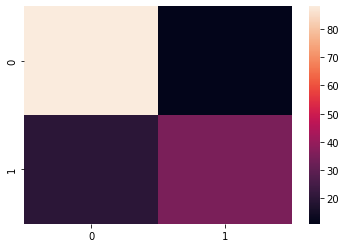

In [17]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm)

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [19]:
import seaborn as sns
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


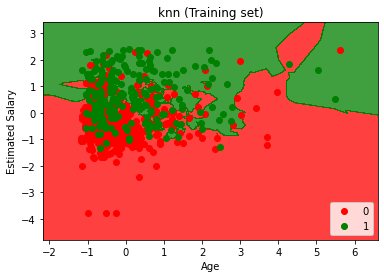

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(
                            start = X_set[:, 0].min() - 1, 
                            stop = X_set[:, 0].max() + 1, 
                            step = 0.01),
                        np.arange(
                            start = X_set[:, 1].min() - 1, 
                            stop = X_set[:, 1].max() + 1, 
                            step = 0.01)
                                )
plt.contourf(X1, X2, m.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('knn (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [21]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [22]:
params = {
    'n_neighbors' : list(range(1,30,3)),
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p':[1,2]

}
params

{'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski'],
 'p': [1, 2]}

In [23]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=3,n_jobs=-1,verbose=2)

In [24]:
grid.fit(scaledX,y)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [25]:
gf = pd.DataFrame(grid.cv_results_)

In [26]:
gf.sort_values(by='rank_test_score',inplace=True)
gf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002518,0.001095,0.017910,0.000773,ball_tree,minkowski,22,2,uniform,"{'algorithm': 'ball_tree', 'metric': 'minkowsk...",0.730469,0.757812,0.750000,0.746094,0.011500,1
24,0.001332,0.000472,0.017846,0.000432,ball_tree,minkowski,19,1,uniform,"{'algorithm': 'ball_tree', 'metric': 'minkowsk...",0.734375,0.738281,0.765625,0.746094,0.013902,1
70,0.003000,0.002830,0.019984,0.005343,kd_tree,minkowski,22,2,uniform,"{'algorithm': 'kd_tree', 'metric': 'minkowski'...",0.730469,0.757812,0.750000,0.746094,0.011500,1
104,0.006339,0.007548,0.021175,0.000845,brute,minkowski,19,1,uniform,"{'algorithm': 'brute', 'metric': 'minkowski', ...",0.734375,0.738281,0.765625,0.746094,0.013902,1
110,0.001336,0.000465,0.022336,0.000437,brute,minkowski,22,2,uniform,"{'algorithm': 'brute', 'metric': 'minkowski', ...",0.730469,0.757812,0.750000,0.746094,0.011500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.001327,0.000460,0.004154,0.001011,brute,minkowski,1,1,distance,"{'algorithm': 'brute', 'metric': 'minkowski', ...",0.675781,0.648438,0.660156,0.661458,0.011201,115
80,0.002184,0.001675,0.019120,0.003391,brute,minkowski,1,1,uniform,"{'algorithm': 'brute', 'metric': 'minkowski', ...",0.675781,0.648438,0.660156,0.661458,0.011201,115
1,0.006012,0.002015,0.004883,0.000429,ball_tree,minkowski,1,1,distance,"{'algorithm': 'ball_tree', 'metric': 'minkowsk...",0.675781,0.648438,0.660156,0.661458,0.011201,115
40,0.001022,0.000818,0.015159,0.000797,kd_tree,minkowski,1,1,uniform,"{'algorithm': 'kd_tree', 'metric': 'minkowski'...",0.675781,0.648438,0.660156,0.661458,0.011201,115


In [27]:
grid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=19, p=1)

In [28]:
dump(grid.best_estimator_,"dibates.pkl")

['dibates.pkl']

In [29]:
params2 = {
    'n_neighbors' : list(range(1,30,3)),
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'weights': ['uniform', 'distance'],
    'metric': ['precomputed'],
    'p':[1,2]

}
params2

{'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'weights': ['uniform', 'distance'],
 'metric': ['precomputed'],
 'p': [1, 2]}

In [30]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params2,cv=3,n_jobs=-1,verbose=2)

In [31]:
grid.fit(scaledX,y)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
